In [2]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Understanding the dataset

In [23]:
# Reading the data set

df=pd.read_excel(r"D:\data science - guvi\MDT-34\capstone project\Project 4 - Industrial Copper Modelling\Copper_Set.xlsx")
df1=df.copy()

In [24]:
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [25]:
df1.info(),df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


(None, (181673, 14))

 Here I see the data type of **item_date , quantity tons , delivery date** has to be changes

In [26]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [27]:
df1.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [28]:
df1.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [29]:
df1.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

## Data Preprocessing and EDA

In [30]:
# changing data types and cleaning the data
df1['item_date'] = pd.to_datetime(df1['item_date'], format='%Y%m%d', errors='coerce').dt.date
df1['delivery date'] = pd.to_datetime(df1['item_date'], format='%Y%m%d', errors='coerce').dt.date
df1['quantity tons'] = pd.to_numeric(df1['quantity tons'],errors='coerce')
df1['material_ref'] = df1['material_ref'].str.lstrip('0')
df1['quantity tons']=np.abs(df1['quantity tons'])
df1['selling_price']=np.abs(df1['selling_price'])

In [31]:
# splitting the item date and delivery date columns into year , month and day

df1['item_date']=pd.to_datetime(df1['item_date'])
df1['delivery date']=pd.to_datetime(df1['delivery date'])

df1['item_date_day']=df1['item_date'].dt.day
df1['item_date_month']=df1['item_date'].dt.month
df1['item_date_year']=df1['item_date'].dt.year

df1['delivery_date_day']=df1['delivery date'].dt.day
df1['delivery_date_month']=df1['delivery date'].dt.month
df1['delivery_date_year']=df1['delivery date'].dt.year

# dropping the columns item_date and delivery date

df1=df1.drop(columns=['item_date','delivery date'],axis=1)

In [32]:
# missing value percentage
percentage_of_missing_values={}
for col in df1.columns:
    percentage_of_missing_values[col]=round(((df1[col].isna().sum())/df1.shape[0])*100,3)
percentage_of_missing_values

{'id': 0.001,
 'quantity tons': 0.001,
 'customer': 0.001,
 'country': 0.015,
 'status': 0.001,
 'item type': 0.0,
 'application': 0.013,
 'thickness': 0.001,
 'width': 0.0,
 'material_ref': 42.89,
 'product_ref': 0.0,
 'selling_price': 0.001,
 'item_date_day': 0.002,
 'item_date_month': 0.002,
 'item_date_year': 0.002,
 'delivery_date_day': 0.002,
 'delivery_date_month': 0.002,
 'delivery_date_year': 0.002}

The material_ref column has around 40% null values , impting the column will reduse the accuracy. So we can drop the column.

The id column has unique values and hence that can be removed as it is an unwanted feature while training ML models.

The percentage of missing values for all the columns except material_ref is less than 0.01% . Hence we can drop the rows will null values.

In [33]:
# Dropping unecessary columns : id 
df1=df1.drop(['id'],axis=1)

# Handling missing values 
df1=df1.drop(['material_ref'],axis=1)
df1=df1.dropna(axis=0)

In [34]:
df1.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00,1.0,4.0,2021.0,1.0,4.0,2021.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00,1.0,4.0,2021.0,1.0,4.0,2021.0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33,1.0,4.0,2021.0,1.0,4.0,2021.0
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00,1.0,4.0,2021.0,1.0,4.0,2021.0
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00,1.0,4.0,2021.0,1.0,4.0,2021.0


#### encoding categorical variables

In [35]:
# Encoding the categorical columns using Ordinal encoding 

from sklearn.preprocessing import OrdinalEncoder

columns_to_encode=['item type','status']

ordinal_encoder=OrdinalEncoder(categories=[['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'],['Lost','Won', 'Draft', 'To be approved' , 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'] ])

new_data = ordinal_encoder.fit_transform(df1[['item type','status']])
df1.drop(columns=['item type','status'],axis=1,inplace=True)

new_df = pd.DataFrame(new_data, 
                      index=df1.index, 
                      columns=['item type','status'])

df1= pd.concat([df1, new_df], axis=1)

# Get the mapping of each column (category to encoded value)
mappings = {}

for i, column in enumerate(columns_to_encode):
    mapping = dict(zip(ordinal_encoder.categories_[i], range(len(ordinal_encoder.categories_[i]))))
    mappings[column] = mapping
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")

item type: {'W': 0, 'WI': 1, 'S': 2, 'Others': 3, 'PL': 4, 'IPL': 5, 'SLAWR': 6}
status: {'Lost': 0, 'Won': 1, 'Draft': 2, 'To be approved': 3, 'Not lost for AM': 4, 'Wonderful': 5, 'Revised': 6, 'Offered': 7, 'Offerable': 8}


In [37]:
df1.head()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year,item type,status
0,54.151139,30156308.0,28.0,10.0,2.00,1500.0,1670798778,854.00,1.0,4.0,2021.0,1.0,4.0,2021.0,0.0,1.0
1,768.024839,30202938.0,25.0,41.0,0.80,1210.0,1668701718,1047.00,1.0,4.0,2021.0,1.0,4.0,2021.0,0.0,1.0
2,386.127949,30153963.0,30.0,28.0,0.38,952.0,628377,644.33,1.0,4.0,2021.0,1.0,4.0,2021.0,1.0,1.0
3,202.411065,30349574.0,32.0,59.0,2.30,1317.0,1668701718,768.00,1.0,4.0,2021.0,1.0,4.0,2021.0,2.0,1.0
4,785.526262,30211560.0,28.0,10.0,4.00,2000.0,640665,577.00,1.0,4.0,2021.0,1.0,4.0,2021.0,0.0,1.0


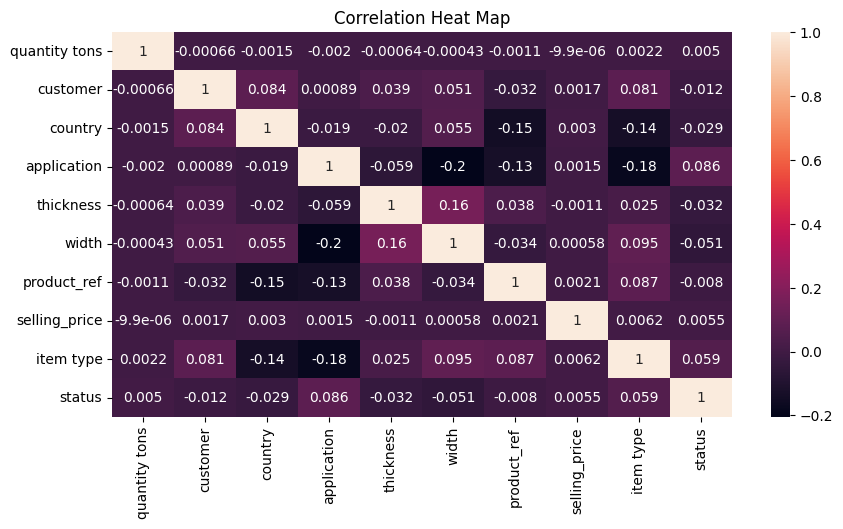

In [16]:
# Checking for correlation of features using heat map

df_num=df1[['quantity tons', 'customer', 'country', 'application','thickness', 'width', 'product_ref', 'selling_price','item type', 'status']]
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True)
plt.title("Correlation Heat Map")
plt.show()

#### Checking for outliers and skewness

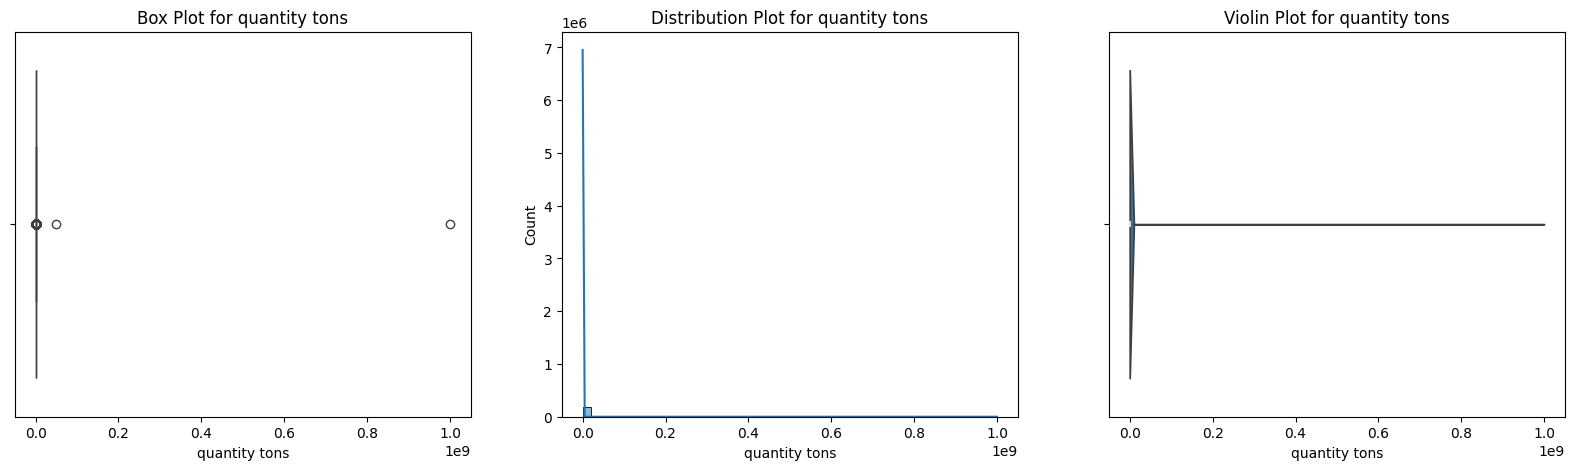

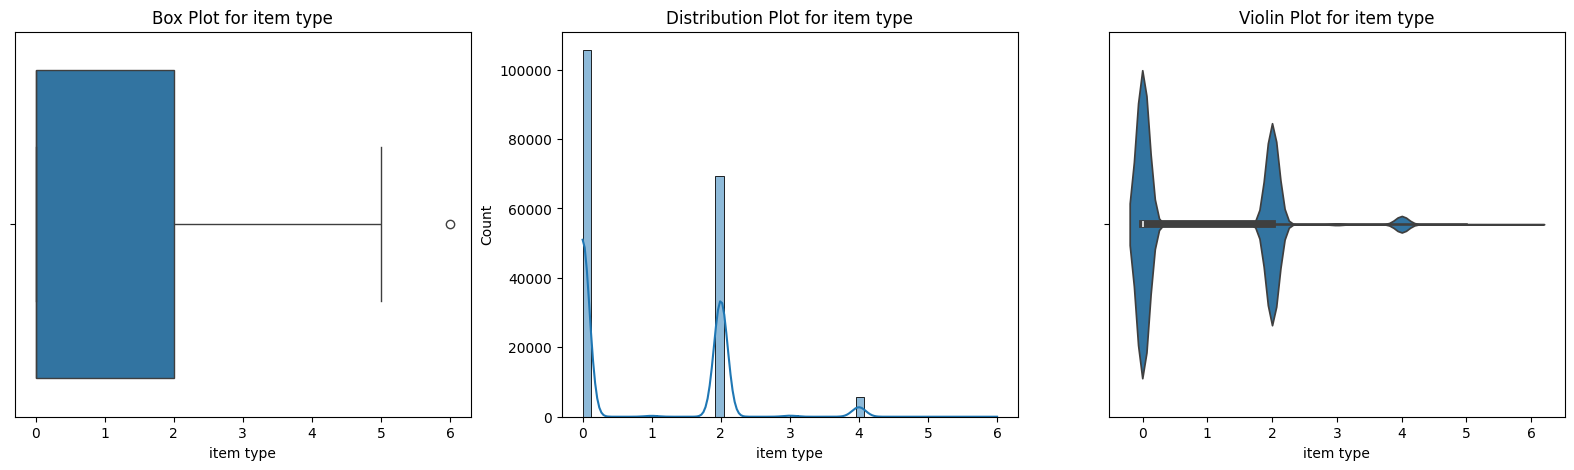

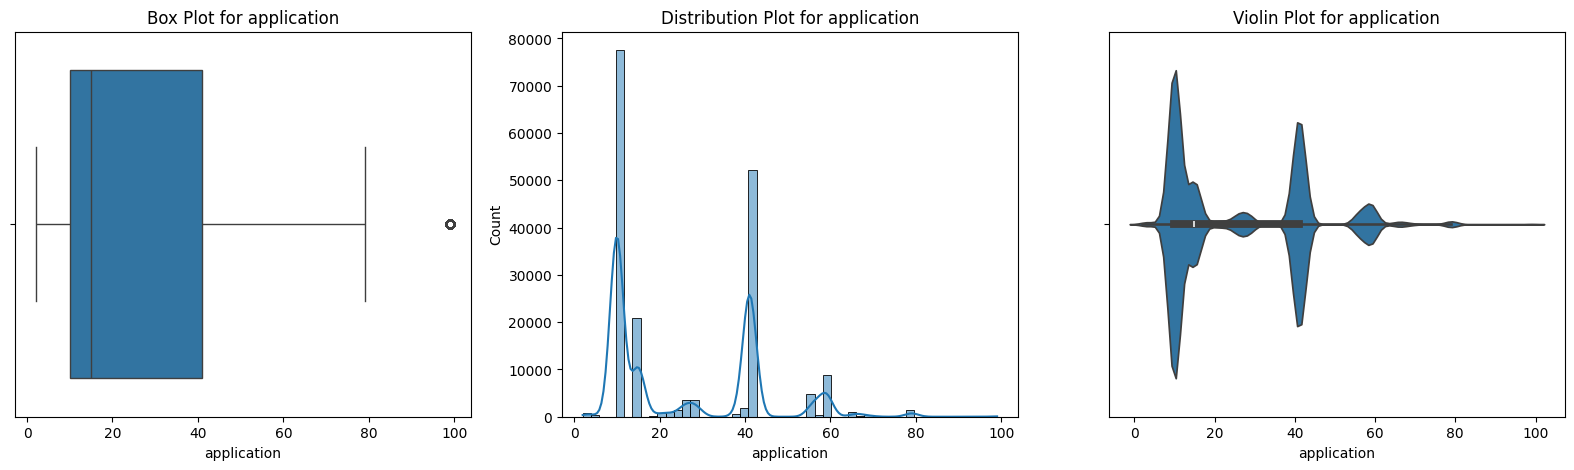

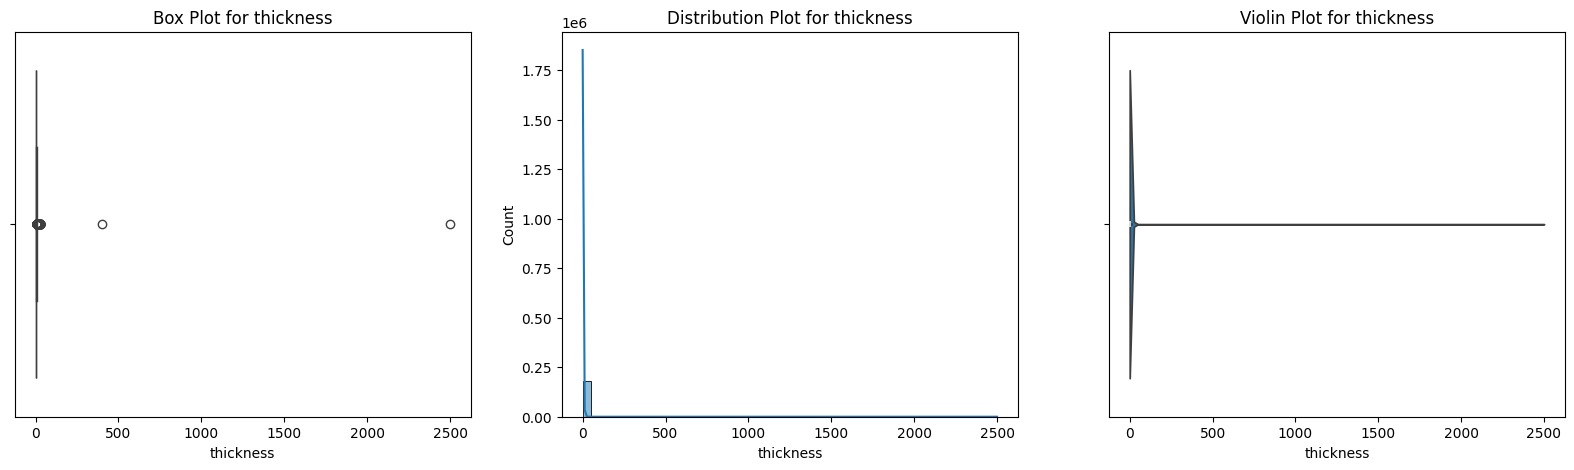

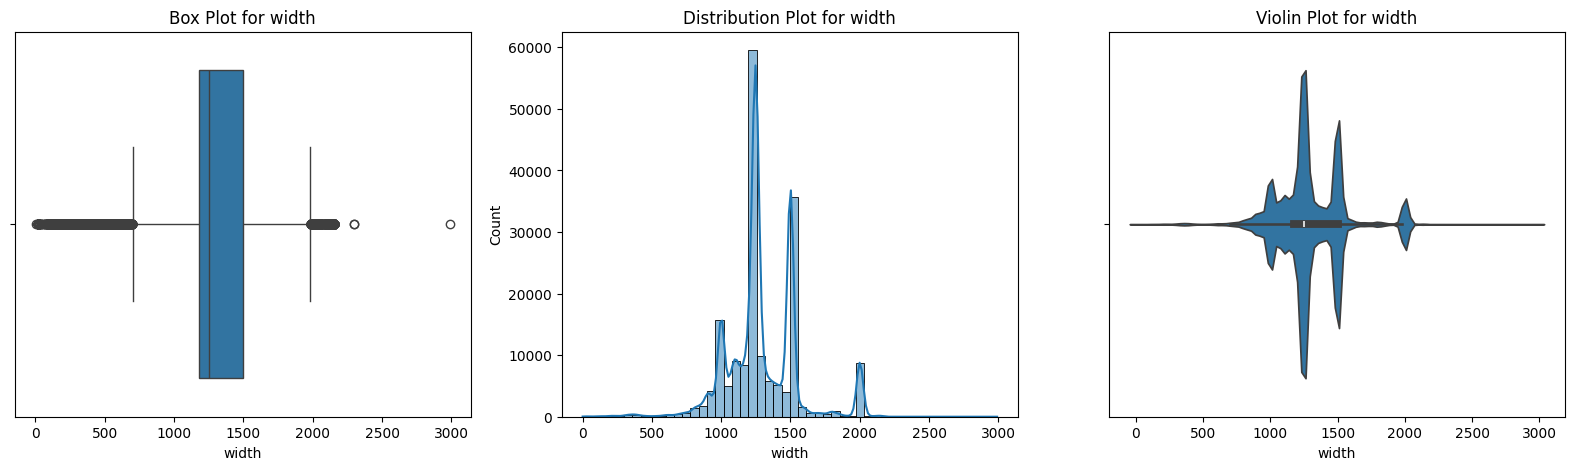

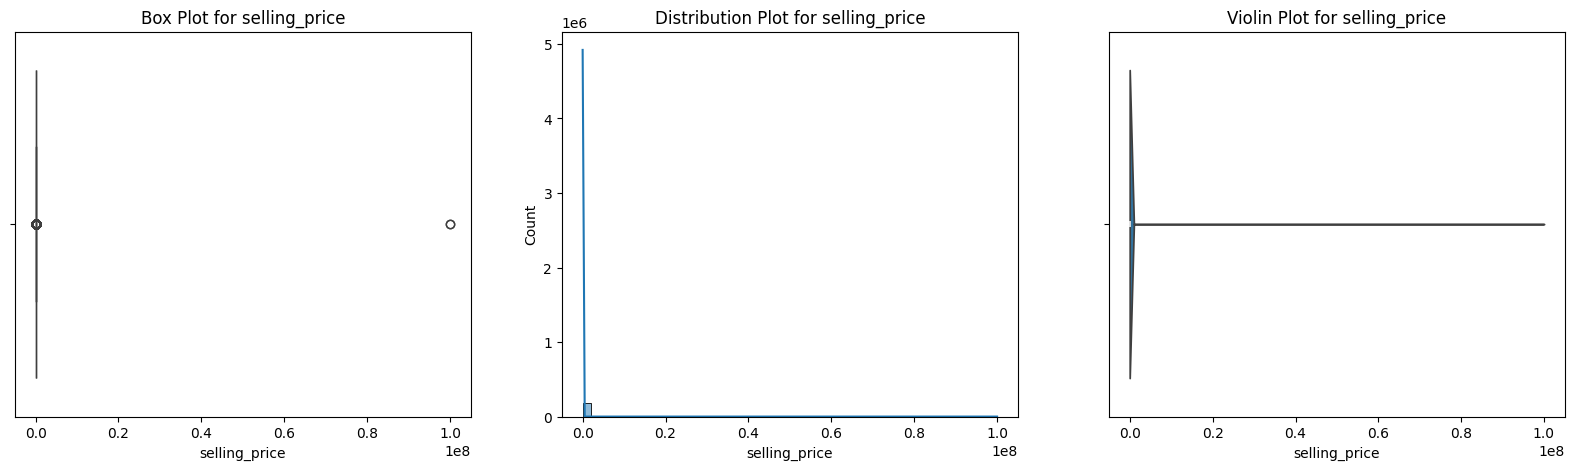

In [38]:
# Checking for skewness and outliers in the features 

columns=['quantity tons', 'item type', 'application', 'thickness', 'width', 'selling_price']

for column in columns:

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df1, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df1, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df1, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [39]:
df1.isna().sum()

quantity tons          0
customer               0
country                0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
item type              0
status                 0
dtype: int64

In [40]:
df2=df1.copy()

#### Insights from the above plots:

**Box plot** - we see there are outliers in **thickness , width ,quantity tons, selling price** features. Here we are gonna treat it with IQR method as they are not normally distributed .

**Hitogram and violin plot** - we see that **selling price , thickness ,quantity tons** are skewed. These are right skewed. Hence we are treating with log transformation .

#### Treating outliers - IQR method

In [41]:
columns=['quantity tons', 'thickness', 'width', 'selling_price']

for column in columns:
    q1=df2[column].quantile(0.25)
    q3=df2[column].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+(IQR*1.5)
    lower_bound=q1-(IQR*1.5)
    df2[column]=df2[column].clip(lower_bound,upper_bound)

In [256]:
df2.isna().sum()

quantity tons          0
customer               0
country                0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
item type              0
status                 0
dtype: int64

In [ ]:
# After treating outliers in the features 

columns=['quantity tons', 'thickness', 'width', 'selling_price']

for column in columns:

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

#### Treating skewness - log transformation

In [ ]:
columns=['quantity tons','thickness','selling_price']

for column in columns:
    df2[column]=np.log(df2[column])

In [ ]:
# After treating skewness in the features 

columns=['quantity tons', 'thickness', 'width', 'selling_price']

for column in columns:

    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df2, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df2, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df2, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

In [45]:
df2.isna().sum()

quantity tons          0
customer               0
country                0
application            0
thickness              0
width                  0
product_ref            0
selling_price          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery_date_day      0
delivery_date_month    0
delivery_date_year     0
item type              0
status                 0
dtype: int64

In [46]:
df2.to_csv('cleaned_data.csv',index=False)